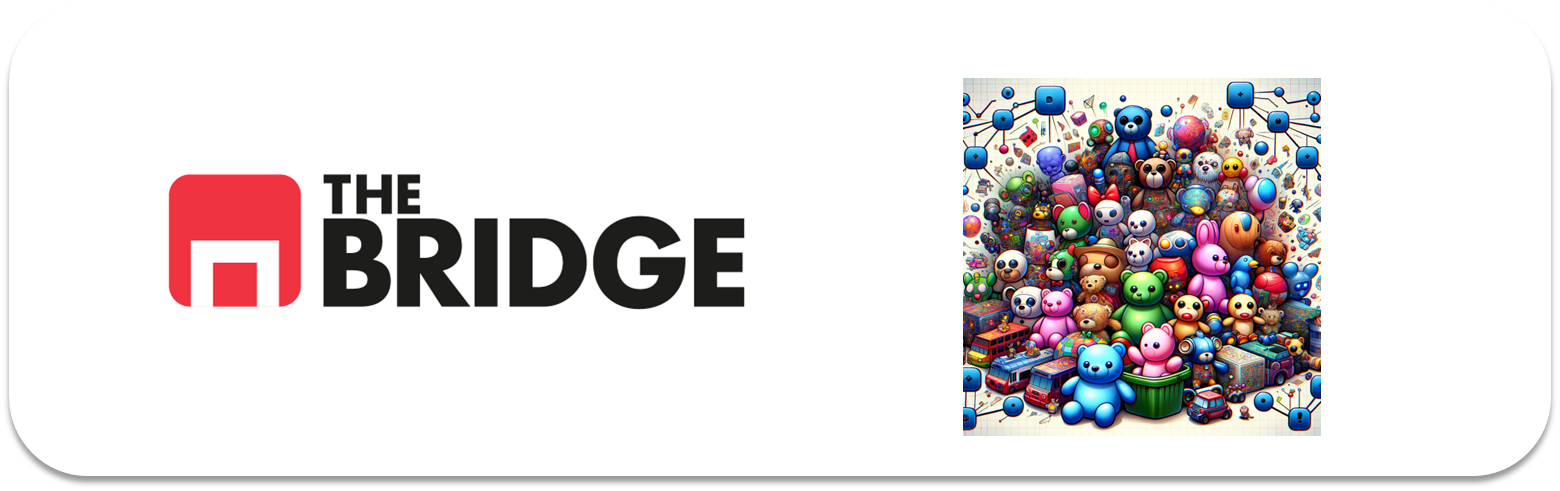

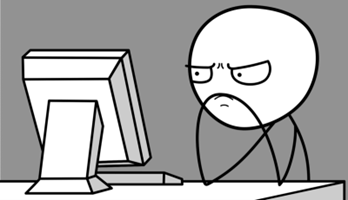

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [62]:
import numpy as np
import seaborn as sns
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import bootcampviztools as bt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [2]:
# Carga y visualización inicial de los datos

In [3]:
df = pd.read_csv("./data/empowering_drinks.csv", sep = "|")

In [4]:
df.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [6]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


In [7]:
# el rango de los valores numéricos no es tan amplio. Aún así, de 1.5 a 3 hay el doble. ¿Hay que escalarlos?

In [8]:
# Ahora, Mini EDA yselección de features

<Axes: >

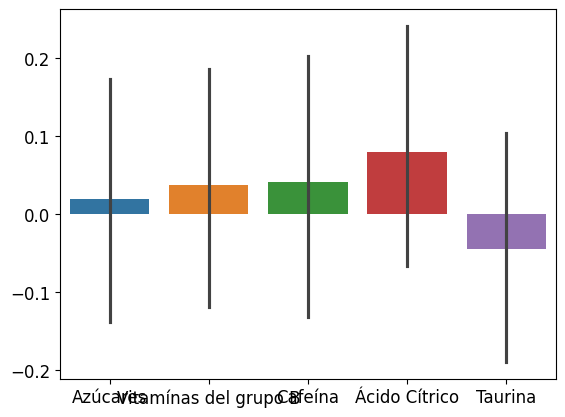

In [9]:
sns.barplot(df)
#mmm, este creo que no aporta mucho...

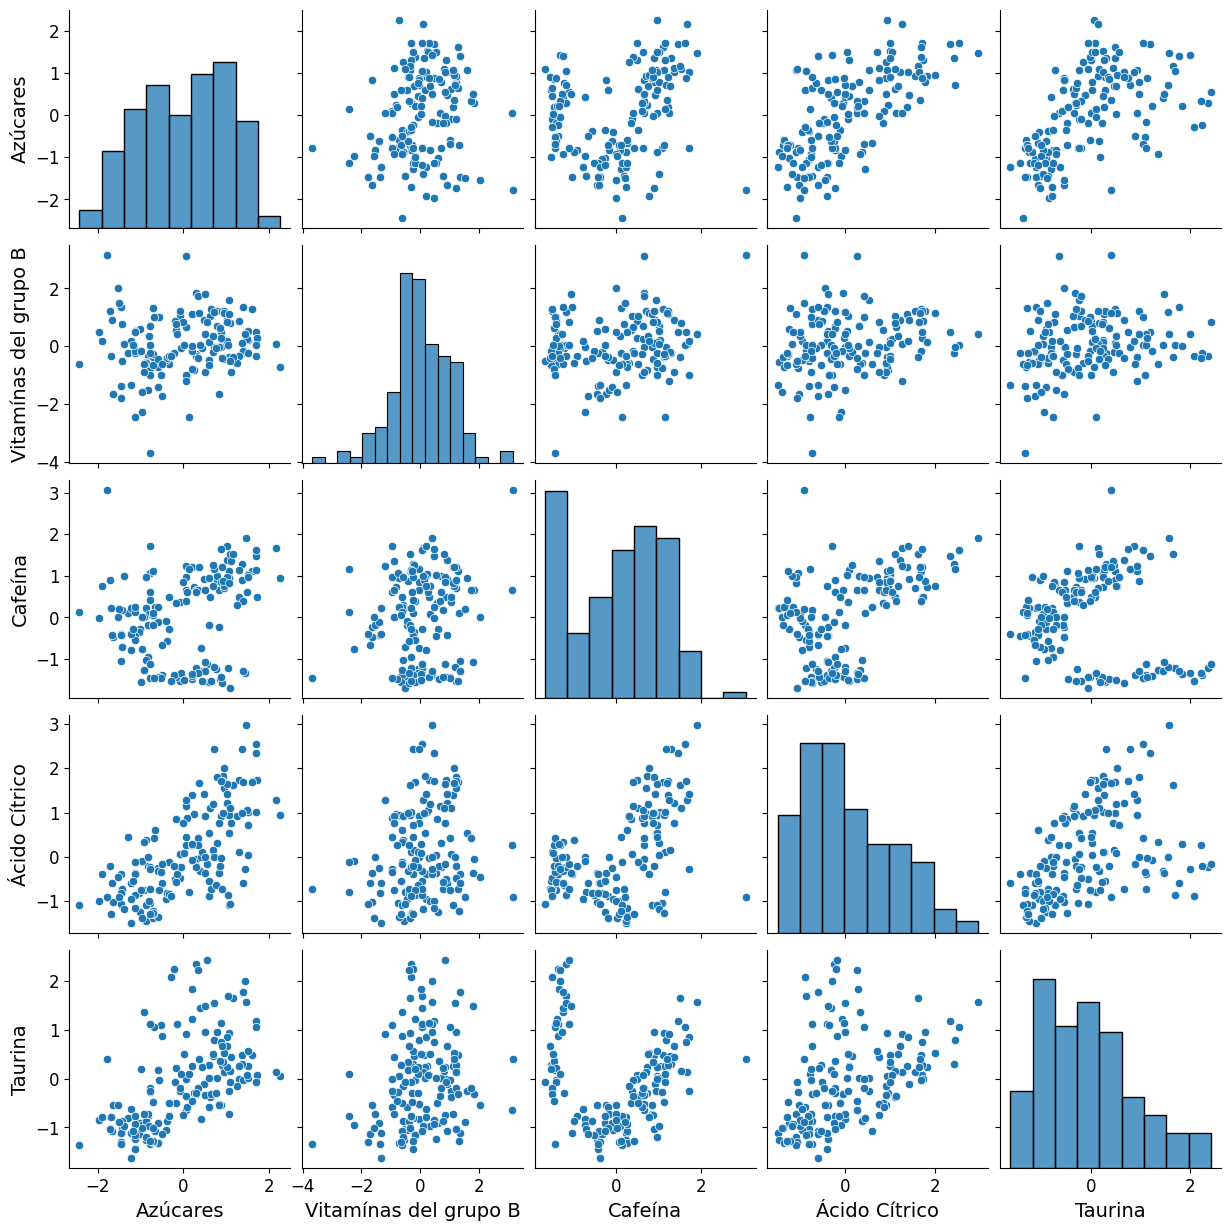

In [10]:
sns.pairplot(df)

Parecería haber posibles relaciones y zonas medianamente determinadas si comparamos Taurina con Cafeína, sobre todo. O en menor medida con Ácido Cítrico, O cafeína con azúcares. Solo la de vitaminas del Grupo B no veo a simple vista que tenga correlación con ninguna... ante la duda, y al ser solo una, la incluiré de todos modos en el modelo

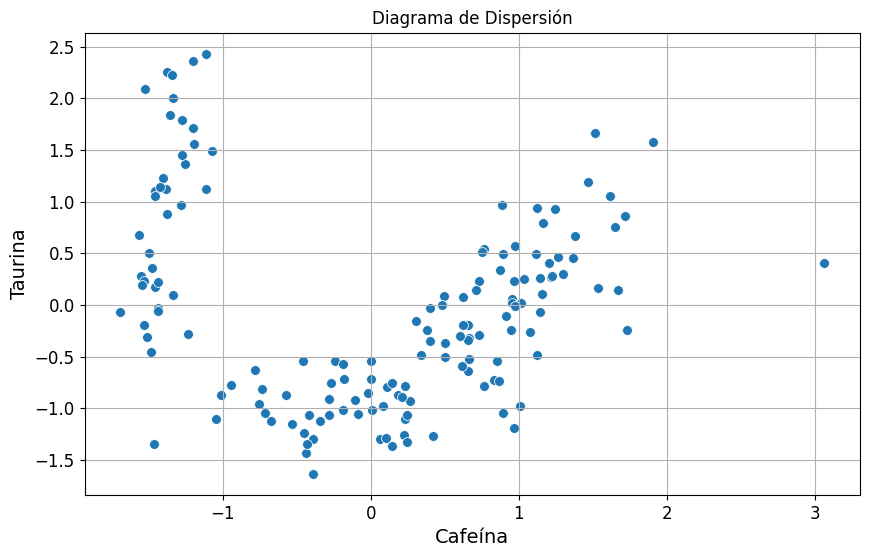

In [11]:
bt.grafico_dispersion_con_correlacion(df, "Cafeína", "Taurina", tamano_puntos=50, mostrar_correlacion=False)
# Esto del toolbox de Jaime no paree aportar nada nuevo... solo una fracción del cuadro general de arriba 
# comparando todas con todas. Ésta en concreto es la combinación más gráfica del dataset dividido en 2 clases

array([[<Axes: title={'center': 'Azúcares'}>,
        <Axes: title={'center': 'Vitamínas del grupo B'}>],
       [<Axes: title={'center': 'Cafeína'}>,
        <Axes: title={'center': 'Ácido Cítrico'}>],
       [<Axes: title={'center': 'Taurina'}>, <Axes: >]], dtype=object)

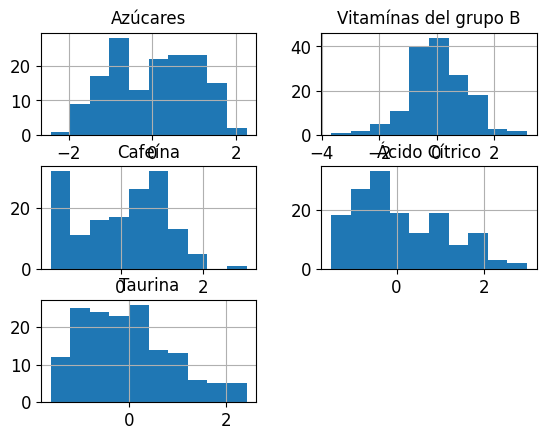

In [12]:
df.hist()

In [13]:
# acido cítrico es la que peor se ve. Las demás, ni tan mal, no sé si vale la pena acampanar más... 
# dirá que no, que así ya está bien

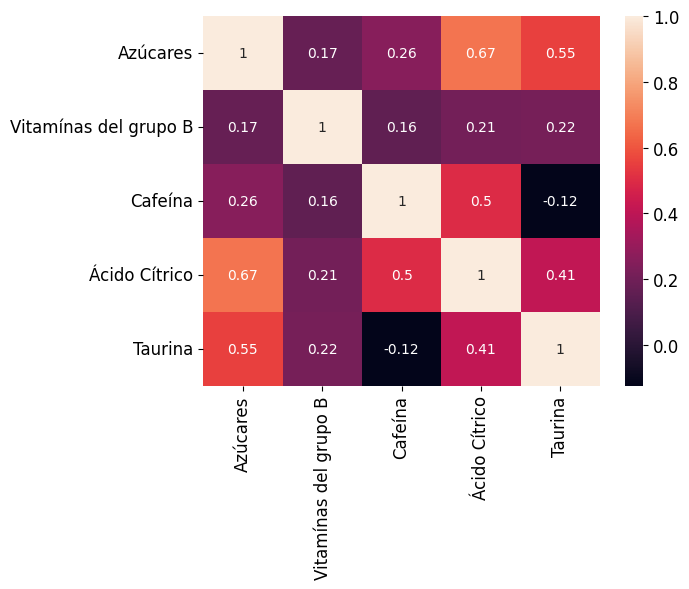

In [14]:
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show();
# pero no tenemos target... no sé si tiene sentido hacer esto.... para ver relaciones entre ellas? Cafeína y Taurina!

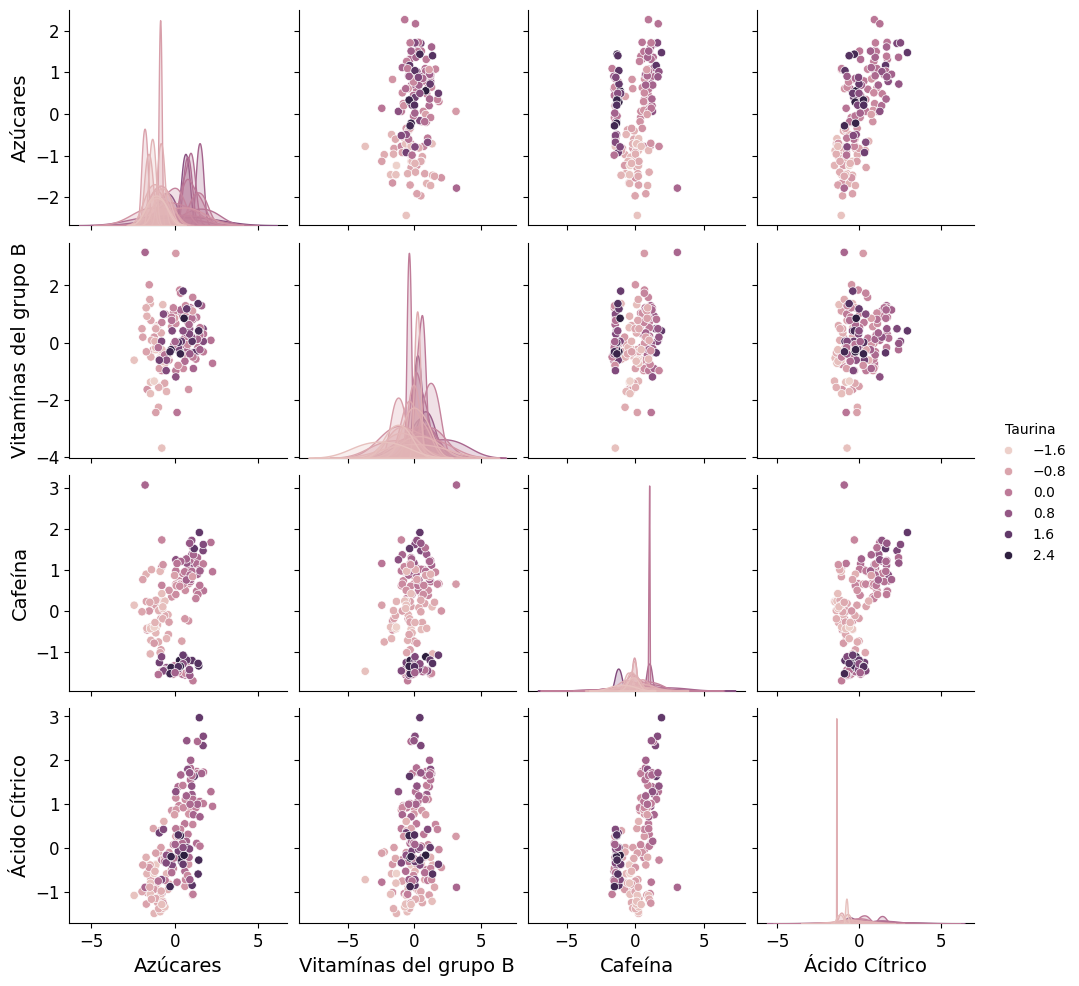

In [15]:
sns.pairplot(df, hue = "Taurina")

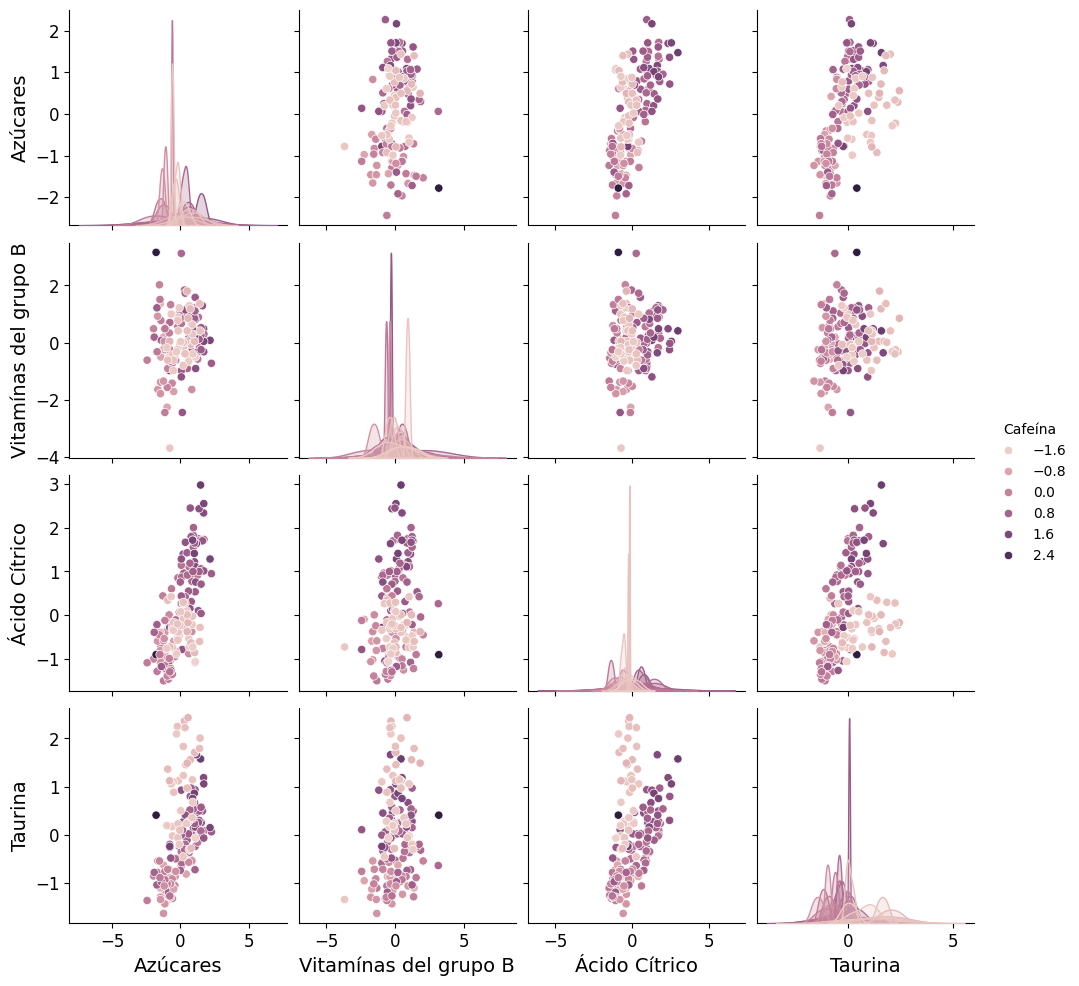

In [16]:
sns.pairplot(df, hue = "Cafeína")

In [17]:
features = df.columns.to_list()
features

['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']

In [18]:
df_select = df.drop('Vitamínas del grupo B', axis = 1)
df_select
# Esta sería si quitara la que no se ve en los gráfico que sea muy relevante, que era solo 1...

,Azúcares,Cafeína,Ácido Cítrico,Taurina
0,1.518613,1.034819,1.013009,0.251717
1,0.246290,0.733629,0.965242,-0.293321
2,0.196879,1.215533,1.395148,0.269020
3,1.691550,1.466525,2.334574,1.186068
4,0.295700,0.663351,-0.037874,-0.319276
...,...,...,...,...
148,0.493343,-1.284344,0.009893,0.969783
149,0.332758,-1.344582,0.280575,2.224236
150,0.209232,-1.354622,0.296498,1.834923
151,1.395086,-1.274305,-0.595160,1.791666


In [19]:
feat_select = df_select.columns.to_list()
feat_select

['Azúcares', 'Cafeína', 'Ácido Cítrico', 'Taurina']

In [20]:
# Tratamiento features

In [21]:
# Son todas numéricas, todas tienen un rango más o menos limitado de valores (aunque 3 sigue siendo el doble de 1.5), 
# y las formas ya parecían medio acampanadas. Me parece que este paso no es necesario.

In [22]:
# Selección del modelo

DBSCAN

In [23]:
# No sé cómo aplicar DBSCAN....

In [24]:
#X = df[['Cafeína', 'Taurina']]
#print(X.head())

In [78]:
dbscan = DBSCAN(eps=0.6,
                min_samples=9)
dbscan.fit(df)

DBSCAN(eps=0.6, min_samples=9)

In [79]:
# El algoritmo
print(dbscan)

# Todos los datos etiquetados
print(len(dbscan.labels_))

# Los 10 primeros labels
print(dbscan.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan.labels_))

# Todo da -1?? Todas son anomalías? Parece como mínimo sospechoso... Algo he hecho mal...
# Resuelto, si eps > 0.5, todas son anomalías, a partir de 0.6 hay más variedad, pero 
# llegando al 1 de nuevo se limita a 0 y poco más
# He dejado 0.8 porque intuyo que tiene que ver con el codo del cuadro de más abajo

DBSCAN(eps=0.6, min_samples=9)
153
[ 0  1  2 -1  1  2  2  1  0  1]
[-1  0  1  2  3  4]


In [81]:
# Cuantos core_sample_indices_
print(len(dbscan.core_sample_indices_))

# Los indices de los 10 primeros core_sample
print(dbscan.core_sample_indices_[:10])
# de la lksta de antes, cuántos son core

# La posicion (coordenadas) de los 5 primeros core_sample
print(dbscan.components_[:5])
# los componentes o coordenadas de esos core

72
[ 0  1  2  4  7 10 11 15 16 19]
[[ 0.25171685  1.03481896  0.        ]
 [-0.29332133  0.73362894  1.        ]
 [ 0.26901965  1.21553297  2.        ]
 [-0.31927553  0.66335127  1.        ]
 [ 0.06138606  0.95450162  1.        ]]


In [82]:
eps_values = [0.6, 0.7, 0.8, 0.9, 0.99]
min_samples_values = [3, 5, 8, 12]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df)  # Usando los datos normalizados
        unique_labels = np.unique(dbscan.labels_)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        print(f"eps={eps}, min_samples={min_samples}, number of clusters={n_clusters}")

# Luego de probar aquí varios valores me quedé con eps = 0.6 y min_samples = 9, que da entre 3 y 5 clústers, como se 
# comenta en el enunciado
# habría que probar más, porque varias combinaciones dan estos 3 a 5 clusters, pwro a ver cuáltiene menos anomalías...
# Pendiente para la próxima

eps=0.6, min_samples=3, number of clusters=7
eps=0.6, min_samples=5, number of clusters=7
eps=0.6, min_samples=8, number of clusters=5
eps=0.6, min_samples=12, number of clusters=3
eps=0.7, min_samples=3, number of clusters=7
eps=0.7, min_samples=5, number of clusters=7
eps=0.7, min_samples=8, number of clusters=5
eps=0.7, min_samples=12, number of clusters=4
eps=0.8, min_samples=3, number of clusters=7
eps=0.8, min_samples=5, number of clusters=7
eps=0.8, min_samples=8, number of clusters=5
eps=0.8, min_samples=12, number of clusters=4
eps=0.9, min_samples=3, number of clusters=7
eps=0.9, min_samples=5, number of clusters=7
eps=0.9, min_samples=8, number of clusters=5
eps=0.9, min_samples=12, number of clusters=3
eps=0.99, min_samples=3, number of clusters=7
eps=0.99, min_samples=5, number of clusters=7
eps=0.99, min_samples=8, number of clusters=5
eps=0.99, min_samples=12, number of clusters=3


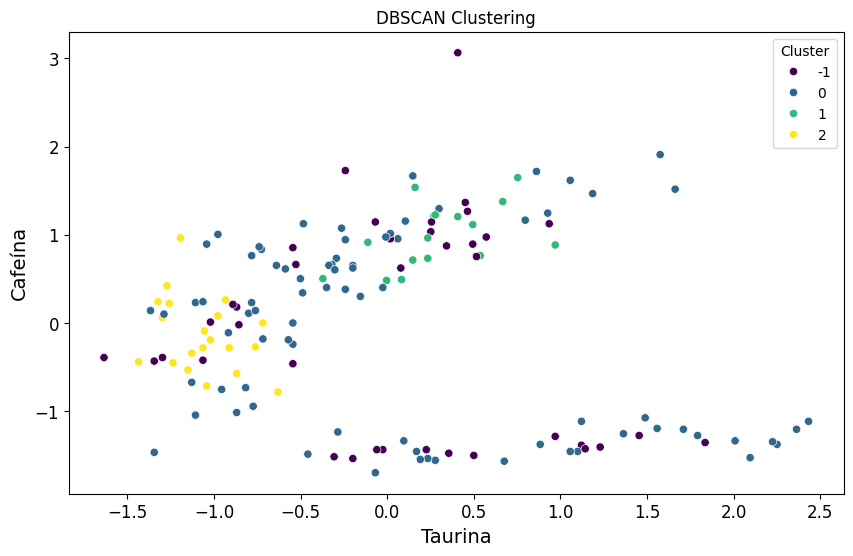

In [84]:
df['Cluster'] = dbscan.labels_

# Visualiza los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Taurina', y='Cafeína', hue='Cluster', data=df, palette='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Taurina")
plt.ylabel("Cafeína")
plt.legend(title='Cluster')
plt.show()

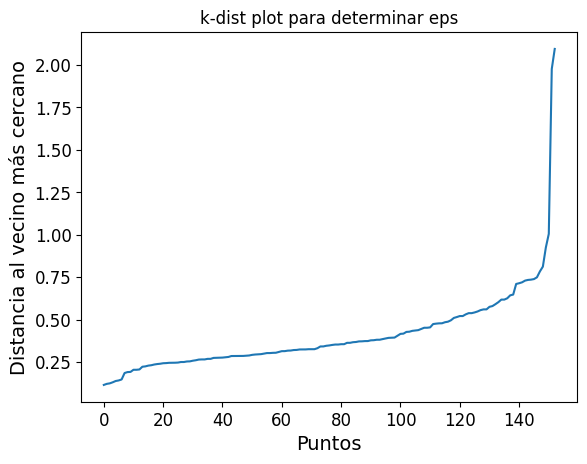

In [83]:
# Aparentemente hay que hacer esto para encontrar el mejor valor de eps...
# ¿como el codo de kmeans? No entiendo qué estoy copiando y pegando aquí:

# Calcula las distancias al punto más cercano
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Ordena las distancias para el gráfico del codo
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('k-dist plot para determinar eps')
plt.xlabel('Puntos')
plt.ylabel('Distancia al vecino más cercano')
plt.show()

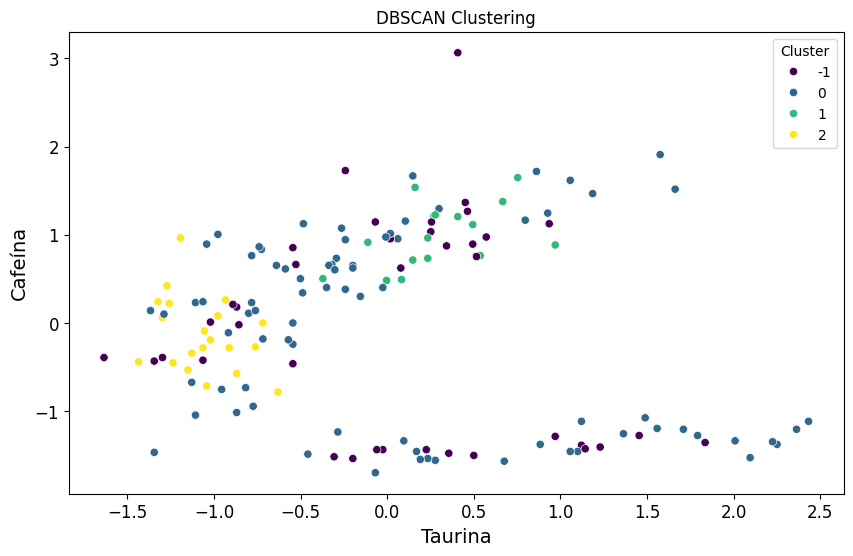

In [85]:
df = pd.DataFrame(df, columns=['Taurina', 'Cafeína'])
df['Cluster'] = dbscan.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Taurina', y='Cafeína', hue='Cluster', data=df, palette='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Taurina")
plt.ylabel("Cafeína")
plt.legend(title='Cluster')
plt.show()

# Es como que todo lo que pruebo me da el mismo gráfico, con regiones similares, aunque a veces haya más o menus clusters

In [86]:
# distingo tres manchurrones dominados por 3 colores, o mezclas de colores: abajo, violeta y azul. 
# Algo más arriba y bien a la izquierda, todas las amarillas y azules. Y más a lo largo y más arriba, otro manchurrón 
# horizontal azul y violeta, y todo el verde.

Clustering jerárquico

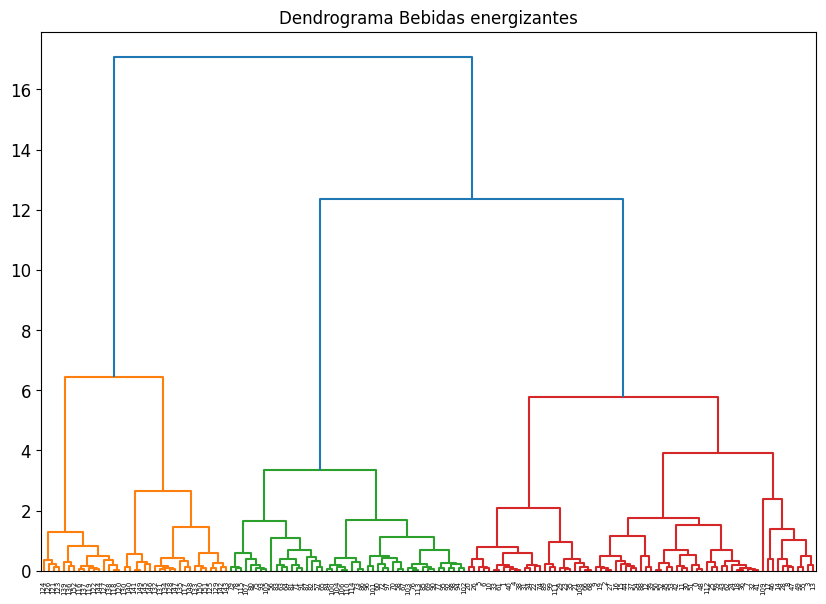

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograma Bebidas energizantes")

selected_data = df[["Cafeína","Taurina"]]
clusters = shc.linkage(selected_data, 
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

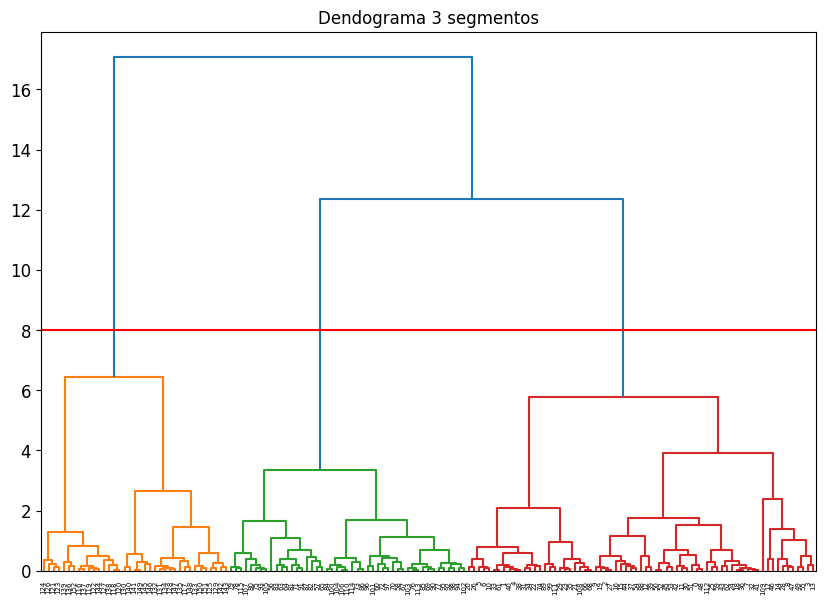

In [30]:
# El fabricante suspechaba que encontraríamos 3 a 5 segmentos. Serían estos:

plt.figure(figsize=(10, 7))
plt.title("Dendograma 3 segmentos")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 8, color = 'r', linestyle = '-')

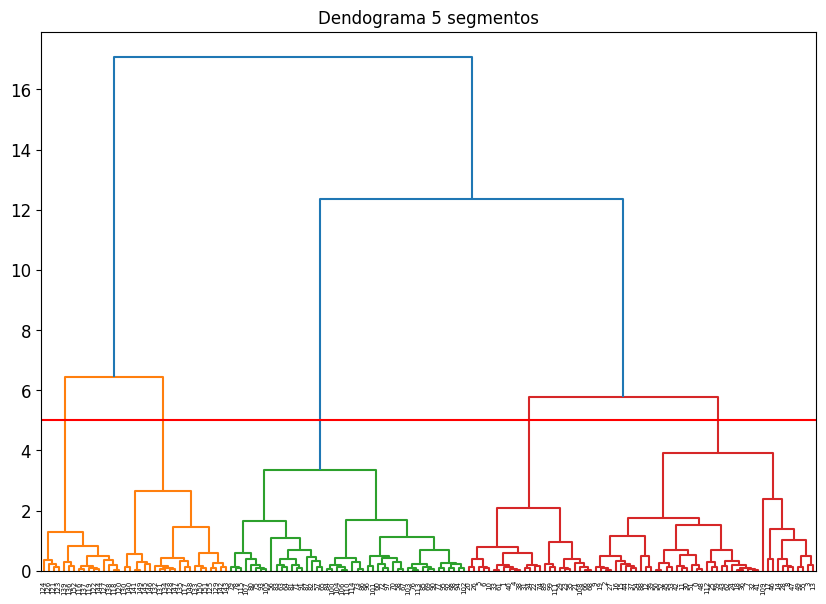

In [31]:
# O estos:
plt.figure(figsize=(10, 7))
plt.title("Dendograma 5 segmentos")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 5, color = 'r', linestyle = '-')

Discusión: este formao jerárquico nos enseña los 3 a 5 segmentos que el clienteexplicaba que ya tenia. Y podemos ver sus parecidos, ya que hay 2 clústes, los naranjas, que se parece bastante entre sí, igual que 2 rojos. Y la distancia entre los rojos y el verde parecen ser menores que entre éstos y los naranjas.

El anterior me confunde un poco, o bastante. Siento que solo he pintado el mismo pairplot un monton de veces y llegando a 
ello desde diversos ángulos, pero sin descubrir nada nuevo ni relevante, solo constatar lo que se veía in tanta fórmla 
desde el inicio que eran la relevancia de las featires Cafeína y Taurina

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [90]:
new_exp = pd.read_csv("./data/new_experiments.csv", sep = "|")
# Me qudedo con el segundo modelo, el jerárquico, ya que con pocos datos funciona bien, es bastante claro, es bueno tratando 
# datos anómalos cosa que en mi caso me han quedado y temo que unos cuantos

In [91]:
new_exp.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


In [94]:
selected_data = df[["Taurina","Cafeína"]]
clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data) 
clustering_model.labels_ 

array([0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 4, 0, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0,
       2, 4, 0, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3],
      dtype=int64)

Text(0.5, 1.0, 'Labeled Data de bebidas energizantes')

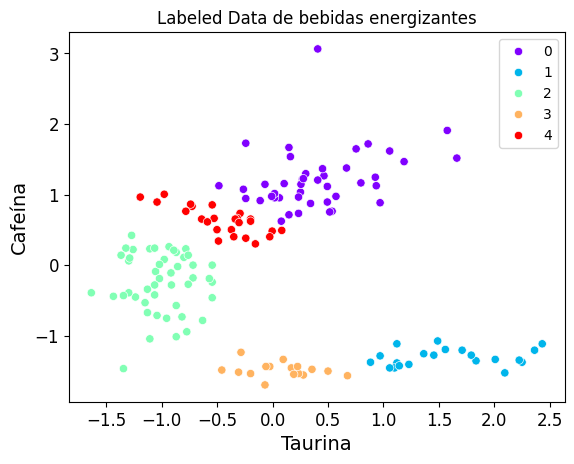

In [96]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Taurina', 
                y='Cafeína', 
                data=selected_data, 
                hue=data_labels, palette = "rainbow").set_title('Labeled Data de bebidas energizantes')

# En este gráfico se ven super bien las 5 clases diferenciadas!

In [ ]:
# Pero no sé cómo usarlo como modelo para futuras predicciones.. :( 
# Aquí me quedo... Ya volveré a intentarlo más adelante...

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.